In [76]:
import pandas as pd
import plotly.express as px
import streamlit as st
import numpy as np
import seaborn as sns

In [112]:
reviews = pd.read_csv('../data/reviews_final.csv')
reviews.head()

,title,review,rating,date,label
0,Ótimo custo benefício.,Até agora estou amando o aparelho. Estou bem s...,5.0,25/10/2019,Good
1,Não recebi a versão global e produto veio sem ...,"Adquiri o produto em 09/11, chegou hoje e para...",1.0,14/11/2019,Bad
2,"Bom, bonito e barato. Porém sem nota fiscal!",Comprei o celular no sábado dia 26/10/19 e che...,5.0,31/10/2019,Good
3,"Bom, no prazo, carregador fora do padrão brasi...","Chegou dentro do prazo, bem embalado. Tudo ok,...",3.0,19/11/2019,Neutral
4,Celular acima das expectativas,O celular superou totalmente minhas expectativ...,5.0,29/10/2019,Good


In [113]:
reviews['date'] = pd.to_datetime(reviews['date'], dayfirst=True)

In [114]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   4769 non-null   object        
 1   review  4769 non-null   object        
 2   rating  4770 non-null   float64       
 3   date    4770 non-null   datetime64[ns]
 4   label   4770 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 186.5+ KB


In [115]:
reviews.head()

,title,review,rating,date,label
0,Ótimo custo benefício.,Até agora estou amando o aparelho. Estou bem s...,5.0,2019-10-25,Good
1,Não recebi a versão global e produto veio sem ...,"Adquiri o produto em 09/11, chegou hoje e para...",1.0,2019-11-14,Bad
2,"Bom, bonito e barato. Porém sem nota fiscal!",Comprei o celular no sábado dia 26/10/19 e che...,5.0,2019-10-31,Good
3,"Bom, no prazo, carregador fora do padrão brasi...","Chegou dentro do prazo, bem embalado. Tudo ok,...",3.0,2019-11-19,Neutral
4,Celular acima das expectativas,O celular superou totalmente minhas expectativ...,5.0,2019-10-29,Good


In [116]:
def get_month(date):
    return date.strftime("%b")

reviews['month'] = reviews.date.apply(get_month)
reviews.head()

,title,review,rating,date,label,month
0,Ótimo custo benefício.,Até agora estou amando o aparelho. Estou bem s...,5.0,2019-10-25,Good,Oct
1,Não recebi a versão global e produto veio sem ...,"Adquiri o produto em 09/11, chegou hoje e para...",1.0,2019-11-14,Bad,Nov
2,"Bom, bonito e barato. Porém sem nota fiscal!",Comprei o celular no sábado dia 26/10/19 e che...,5.0,2019-10-31,Good,Oct
3,"Bom, no prazo, carregador fora do padrão brasi...","Chegou dentro do prazo, bem embalado. Tudo ok,...",3.0,2019-11-19,Neutral,Nov
4,Celular acima das expectativas,O celular superou totalmente minhas expectativ...,5.0,2019-10-29,Good,Oct


In [117]:
def get_year(date):
    return date.strftime("%y")

reviews['year'] = reviews.date.apply(get_year)
reviews.head()

,title,review,rating,date,label,month,year
0,Ótimo custo benefício.,Até agora estou amando o aparelho. Estou bem s...,5.0,2019-10-25,Good,Oct,19
1,Não recebi a versão global e produto veio sem ...,"Adquiri o produto em 09/11, chegou hoje e para...",1.0,2019-11-14,Bad,Nov,19
2,"Bom, bonito e barato. Porém sem nota fiscal!",Comprei o celular no sábado dia 26/10/19 e che...,5.0,2019-10-31,Good,Oct,19
3,"Bom, no prazo, carregador fora do padrão brasi...","Chegou dentro do prazo, bem embalado. Tudo ok,...",3.0,2019-11-19,Neutral,Nov,19
4,Celular acima das expectativas,O celular superou totalmente minhas expectativ...,5.0,2019-10-29,Good,Oct,19


In [119]:
counts = pd.DataFrame(reviews.groupby(['month', 'year', 'label'])['label'].count())
counts.columns = ['count']
counts.head()

count
month year label         
Apr   20   Bad          8
           Good       171
           Neutral      5
      21   Bad          2
           Good        64

In [120]:
counts = counts.reset_index()
counts.head()

,month,year,label,count
0,Apr,20,Bad,8
1,Apr,20,Good,171
2,Apr,20,Neutral,5
3,Apr,21,Bad,2
4,Apr,21,Good,64


In [121]:
new_dates = []

for row in counts.itertuples():
    new_dates.append(f'{row.month}-{row.year}')

counts['new_date'] = new_dates
counts.head()

,month,year,label,count,new_date
0,Apr,20,Bad,8,Apr-20
1,Apr,20,Good,171,Apr-20
2,Apr,20,Neutral,5,Apr-20
3,Apr,21,Bad,2,Apr-21
4,Apr,21,Good,64,Apr-21


In [122]:
counts['year'] = pd.to_numeric(counts['year'])

In [123]:
counts_filtered = counts.query("year == 20 or year == 21")
counts_filtered.head()

,month,year,label,count,new_date
0,Apr,20,Bad,8,Apr-20
1,Apr,20,Good,171,Apr-20
2,Apr,20,Neutral,5,Apr-20
3,Apr,21,Bad,2,Apr-21
4,Apr,21,Good,64,Apr-21


In [124]:
counts_filtered['new_dt'] = pd.to_datetime(counts_filtered['new_date'], format='%b-%y')
counts_filtered.head()

/var/folders/66/rdrgd_1d5l96w3n33yg1c8dh0000gn/T/ipykernel_34056/1248287533.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month,year,label,count,new_date,new_dt
0,Apr,20,Bad,8,Apr-20,2020-04-01
1,Apr,20,Good,171,Apr-20,2020-04-01
2,Apr,20,Neutral,5,Apr-20,2020-04-01
3,Apr,21,Bad,2,Apr-21,2021-04-01
4,Apr,21,Good,64,Apr-21,2021-04-01


In [127]:
counts_filtered = counts_filtered.sort_values('new_dt')

In [128]:
counts_filtered.head()

,month,year,label,count,new_date,new_dt
31,Jan,20,Neutral,19,Jan-20,2020-01-01
30,Jan,20,Good,631,Jan-20,2020-01-01
29,Jan,20,Bad,20,Jan-20,2020-01-01
22,Feb,20,Neutral,14,Feb-20,2020-02-01
21,Feb,20,Good,658,Feb-20,2020-02-01


In [133]:
counts_filtered.new_date.unique()

array(['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20',
       'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
       'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21',
       'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21'],
      dtype=object)

In [168]:
percentages = []

for distinct_month_year in counts_filtered.new_date.unique():
    print(distinct_month_year)
    dataset = counts_filtered.query(f'new_date == "{distinct_month_year}"')
    total = sum(dataset['count']) 
    print(total)
    
    month_year_values = dataset['count'].values
    
    if month_year_values.size > 0:
        for value in month_year_values:
            percentage = (value * 100)/total
            print(percentage)
            percentages.append(percentage)
    else:
        pass
        
counts_filtered['monthly_perc'] = percentages 

Jan-20
670
2.8358208955223883
94.17910447761194
2.985074626865672
Feb-20
693
2.0202020202020203
94.94949494949495
3.0303030303030303
Mar-20
592
3.3783783783783785
92.9054054054054
3.7162162162162162
Apr-20
184
4.3478260869565215
92.93478260869566
2.717391304347826
May-20
193
2.5906735751295336
93.26424870466322
4.1450777202072535
Jun-20
260
1.9230769230769231
95.38461538461539
2.6923076923076925
Jul-20
292
92.12328767123287
3.767123287671233
4.109589041095891
Aug-20
239
0.8368200836820083
95.39748953974896
3.7656903765690375
Sep-20
162
2.4691358024691357
92.5925925925926
4.938271604938271
Oct-20
125
4.0
8.8
87.2
Nov-20
101
93.06930693069307
1.9801980198019802
4.9504950495049505
Dec-20
68
5.882352941176471
91.17647058823529
2.9411764705882355
Jan-21
68
11.764705882352942
2.9411764705882355
85.29411764705883
Feb-21
69
89.85507246376811
5.797101449275362
4.3478260869565215
Mar-21
92
3.260869565217391
89.1304347826087
7.608695652173913
Apr-21
67
2.985074626865672
1.492537313432836
95.52238

In [169]:
counts_filtered.head(40)

,month,year,label,count,new_date,new_dt,monthly_perc
31,Jan,20,Neutral,19,Jan-20,2020-01-01,2.835821
30,Jan,20,Good,631,Jan-20,2020-01-01,94.179104
29,Jan,20,Bad,20,Jan-20,2020-01-01,2.985075
22,Feb,20,Neutral,14,Feb-20,2020-02-01,2.020202
21,Feb,20,Good,658,Feb-20,2020-02-01,94.949495
20,Feb,20,Bad,21,Feb-20,2020-02-01,3.030303
48,Mar,20,Neutral,20,Mar-20,2020-03-01,3.378378
47,Mar,20,Good,550,Mar-20,2020-03-01,92.905405
46,Mar,20,Bad,22,Mar-20,2020-03-01,3.716216
0,Apr,20,Bad,8,Apr-20,2020-04-01,4.347826


2022-03-31 20:39:05.515 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-03-31 20:39:05.524 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='new_date', ylabel='monthly_perc'>

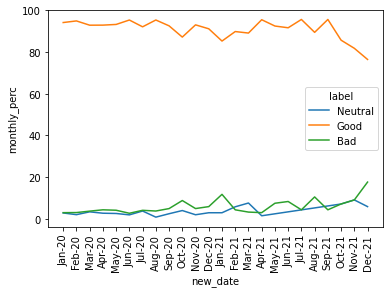

In [170]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
sns.lineplot(data=counts_filtered, x='new_date', y='monthly_perc', hue='label')

In [171]:
counts_filtered.to_csv('../data/monthly_count.csv', index=False)